In [2]:
import numpy as np
import geopandas
import pandas
import pickle
import sklearn
import matplotlib.pyplot as plt

In [3]:
data_dir = '/home/simon/Documents/Bodies/data/OD_dataframes_compiled/'

with open(f'{data_dir}df_ucdp_prio.pkl', 'rb') as file:
    df = pickle.load(file)

In [101]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern, WhiteKernel

# TEMP

In [4]:
test_gid = df.loc[df['log_best'] == df['log_best'].max(), 'gid'].values.item()
mask = df['gid'] == test_gid
df_test = df[mask].copy()
df_test.sort_values('month_id', inplace = True)

In [26]:

kernel_short = ConstantKernel() * Matern(length_scale=4.0, length_scale_bounds=(1, 10.0), nu=1.5)
kernel_long = ConstantKernel() * RBF(length_scale=20.0, length_scale_bounds=(10, 120))


kernel =  kernel_short + kernel_long

noise_std = df_test['log_best'].std()

gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)

In [52]:
y = np.array(df_test['log_best']).reshape(-1, 1)
x = np.array(df_test[['month_id']]).reshape(-1, 1)

In [33]:
gaussian_process.fit(x, y)
gaussian_process.kernel_

0.638**2 * Matern(length_scale=4.28, nu=1.5) + 0.286**2 * RBF(length_scale=59.3)

In [34]:
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)

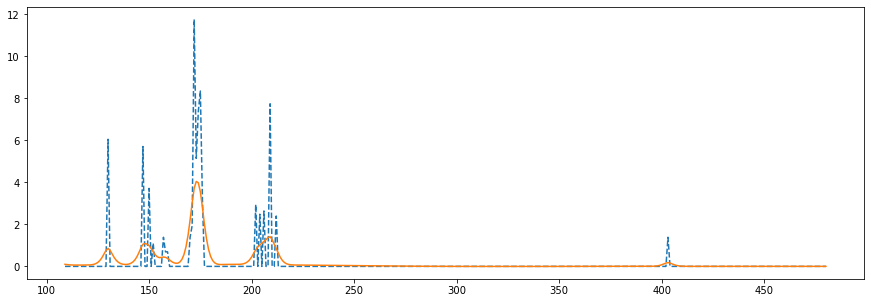

In [35]:
plt.figure(figsize =  [15,5])
plt.plot(x, y, '--', label="log best")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.show()


## Multitaks

In [94]:
test_gids = np.random.choice(df.loc[df['log_best'] > 4, 'gid'].unique(), 2)
mask = df['gid'].isin(test_gids)
df_test2 = df[mask].copy()
df_test2.sort_values(['month_id', 'gid'], inplace = True) # this make reshape work


In [96]:
y = np.array(df_test2['log_best']).reshape(-1, 2)
x = np.array(df_test2[['month_id']]).reshape(-1, 2)


In [104]:
noise_std = y.std()

kernel_short = ConstantKernel() * Matern(length_scale=4.0, length_scale_bounds=(1, 10.0), nu=1.5)
kernel_long = ConstantKernel() * RBF(length_scale=20.0, length_scale_bounds=(10, 120))

kernel =  kernel_short + kernel_long + WhiteKernel(noise_level=noise_std)


# gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [105]:
gaussian_process.fit(x, y)
gaussian_process.kernel_

0.296**2 * Matern(length_scale=8.07, nu=1.5) + 1.28**2 * RBF(length_scale=75.7) + WhiteKernel(noise_level=0.484)

In [106]:
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)

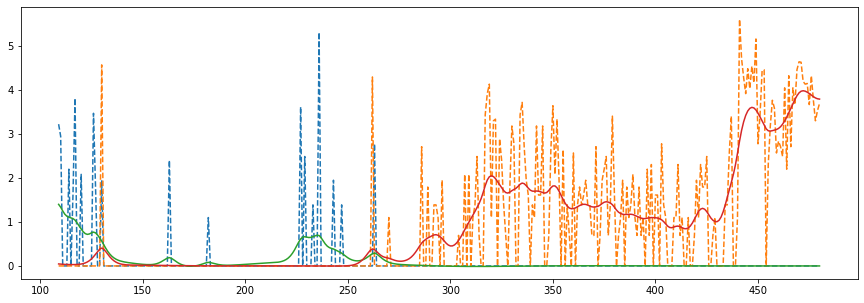

In [107]:
plt.figure(figsize =  [15,5])
plt.plot(x, y, '--', label="log best")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.show()


# Spatial

In [44]:
np.array([y,y]).reshape(-1,2)

(372, 2)

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

In [27]:
mean_prediction

array([ 2.90627260e-55, -9.09014511e-56,  2.84322567e-56, -8.89142478e-57,
        2.77627186e-57, -8.52973633e-58,  2.17596480e-58,  8.92346359e-59,
       -5.30798895e-58,  1.77382189e-57, -5.69515773e-57,  1.82155825e-56,
        7.29775615e-13, -2.28261854e-13,  7.13949299e-14, -2.23310953e-14,
        6.98474210e-15, -2.18468432e-15,  6.83328584e-16, -2.13732671e-16,
        6.68506989e-17, -2.09096965e-17,  6.54019285e-18, -2.04564082e-18,
        6.39832476e-19, -2.00128905e-19,  6.25959623e-20, -1.95788481e-20,
        6.12390242e-21, -1.91543041e-21,  5.99109792e-22, -1.87389528e-22,
        5.86116837e-23, -1.83327740e-23,  5.73409739e-24, -1.79352576e-24,
        3.31479594e-49, -1.03681052e-49,  3.24292134e-50, -1.01432391e-50,
        3.17262342e-51, -9.92325481e-52,  3.10383372e-52, -9.70814280e-53,
        3.03652080e-53, -9.49757587e-54,  2.97067334e-54, -9.29168368e-55,
       -1.12418201e-25,  3.59413706e-25, -1.14909897e-24,  3.67381359e-24,
       -1.17455961e-23,  

In [ ]:
mask = (df_sub.reset_index(level = 0)['gid'] == df_sub[df_sub['log_best'] == df_sub['log_best'].max()].reset_index(level = 0)['gid'].unique().item()).values
df_gp = df_sub[mask]

y = df_gp['log_best']
x = np.array(df_gp.reset_index(level = 1)['month_id']).reshape(-1, 1)

In [ ]:
gaussian_process.fit(x, y)
gaussian_process.kernel_

In [ ]:
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)